# Chapter 7. Unsupervised learning

Clustering

Reduce the dimension 

An extension of the exploratory data analysis


**Unsupervised learning and prediction:**
1. In some cases, we want to predict a category in the absence of any labeled data. For example, we might want to predict the type of vegetation in an area from a set of satellite sensory data. Since we don’t have a response variable to train a model, clustering gives us a way to identify common patterns and categorize the regions.
2. Clustering is an especially important tool for the “cold-start problem.” In this type of problem, such as launching a new marketing campaign or identifying potential new types of fraud or spam, we initially may not have any response to train a model. Over time, as data is collected, we can learn more about the system and build a traditional predictive model. But clustering helps us start the learning process more quickly by identifying population segments
3. Unsupervised learning is also important as a building block for regression and classification techniques. With big data, if a small subpopulation is not well represented in the overall population, the trained model may not perform well for that subpopulation. With clustering, it is possible to identify and label subpopulations. Separate models can then be fit to the different subpopulations. Alternatively, the subpopulation can be represented with its own feature, forcing the overall model to explicitly consider subpopulation identity as a predictor.

## 7.1 Principal components analysis

Often, variables will vary together (covary), and some of the variation in one is actually duplicated by variation in another (e.g., restaurant checks and tips). Principal components analysis (PCA) is a technique to discover the way in which numeric variables covary

The idea in PCA is to combine multiple numeric predictor variables into a smaller set of variables, which are weighted linear combinations of the original set. The smaller set of variables, the principal components, “explains” most of the variability of the full set of variables, reducing the dimension of the data. The weights used to form the principal components reveal the relative contributions of the original variables to the new principal components

PCA can be viewed as the unsupervised version of linear discriminant analysis

### A simple example

For two variables, X1 and X2, there are two principal components Zi (i = 1 or 2): Zi = wi,1X1 + wi,2X2

The weights (wi,1,wi,2) are known as the component loadings. These transform the original variables into the principal components. The first principal component, Z1, is the linear combination that best explains the total variation. The second principal component, Z2, is orthogonal to the first and explains as much of the remaining variation as it can. (If there were additional components, each additional one would be orthogonal to the others.)

Note: It is also common to compute principal components on deviations from the means of the predictor variables, rather than on the values themselves

In [1]:
import numpy as np
import pandas as pd

sp500_px = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/sp500_data.csv',
                       index_col = 0)
oil_px = sp500_px[['XOM', 'CVX']]
oil_px.head()

,XOM,CVX
1993-01-29,-0.016991,0.072921
1993-02-01,0.016991,0.102089
1993-02-02,0.084954,0.029168
1993-02-03,0.067964,0.058337
1993-02-04,0.034378,0.044272


In [2]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
loadings

,XOM,CVX
0,-0.664711,-0.747101
1,0.747101,-0.664711


The weights for CVX and XOM for the first principal component are –0.747 and –0.665, and for the second principal component they are 0.665 and –0.747. How to interpret this? The first principal component is essentially an average of CVX and XOM, reflecting the correlation between the two energy companies. The second principal component measures when the stock prices of CVX and XOM diverge.

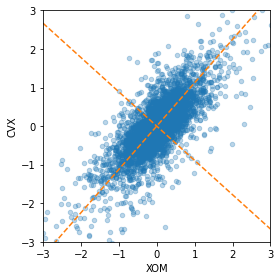

In [3]:
import matplotlib.pyplot as plt

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
        '--', color='C1')

plt.tight_layout()
plt.show()

Note: The weights for the first principal component are both negative, but reversing the sign of all the weights does not change the principal component. For example, using weights of 0.747 and 0.665 for the first principal component is equivalent to the negative weights, just as an infinite line defined by the origin and 1,1 is the same as one defined by the origin and –1, –1.

### Computing the principal components

Going from two variables to more variables is straightforward. For the first component, simply include the additional predictor variables in the linear combination, assigning weights that optimize the collection of the covariation from all the predictor variables into this first principal component (covariance is the statistical term). Calculation of principal components is a classic statistical method, relying on either the correlation matrix of the data or the covariance matrix, and it executes rapidly, not relying on iteration. As noted earlier, principal components analysis works only with numeric variables, not categorical ones. The full process can be described as follows:
1. In creating the first principal component, PCA arrives at the linear combination of predictor variables that maximizes the percent of total variance explained.
2. This linear combination then becomes the first “new” predictor, Z1.
3. PCA repeats this process, using the same variables with different weights, to create a second new predictor, Z . The weighting is done such that Z and Z are uncorrelated.
4. The process continues until you have as many new variables, or components, Zi as original variables Xi
5. Choose to retain as many components as are needed to account for most of the variance
6. The result so far is a set of weights for each component. The final step is to convert the original data into new principal component scores by applying the weights to the original values. These new scores can then be used as the reduced set of predictor variables

### Interpreting principal components

The nature of the principal components often reveals information about the structure of the data. Screeplot to visualize the relative importance of principal components (the name derives from the resemblance of the plot to a scree slope; here, the y-axis is the eigenvalue).

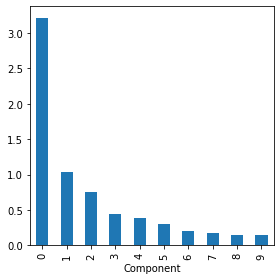

In [4]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
        'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

In [5]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], 
                        columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

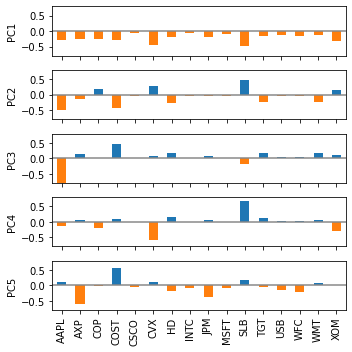

In [6]:
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

The loadings for the first principal component have the same sign: this is typical for data in which all the columns share a common factor (in this case, the overall stock market trend). The second component captures the price changes of energy stocks as compared to the other stocks. The third component is primarily a contrast in the movements of Apple and CostCo. The fourth component contrasts the movements of Schlumberger (SLB) to the other energy stocks. Finally, the fifth component is mostly dominated by financial companies.

**How many components to choose:** If your goal is to reduce the dimension of the data, you must decide how many principal components to select. The most common approach is to use an ad hoc rule to select the components that explain “most” of the variance. You can do this visually through the screeplot. Alternatively, you could select the top components such that the cumulative variance exceeds a threshold, such as 80%. Also, you can inspect the loadings to determine if the component has an intuitive interpretation. Cross-validation provides a more formal method to select the number of significant components

### Correspondence analysis

PCA cannot be used for categorical data; however, a somewhat related technique is correspondence analysis. The goal is to recognize associations between categories, or between categorical features. The similarities between correspondence analysis and principal components analysis are mainly under the hood—the matrix algebra for dimension scaling. Correspondence analysis is used mainly for graphical analysis of low-dimensional categorical data and is not used in the same way that PCA is for dimension reduction as a preparatory step with big data

The input can be seen as a table, with rows representing one variable and columns another, and the cells representing record counts. The output (after some matrix algebra) is a biplot—a scatterplot with axes scaled (and with percentages indicating how much variance is explained by that dimension). The meaning of the units on the axes is not intuitively connected to the original data, and the main value of the scatterplot is to illustrate graphically variables that are associated with one another (by proximity on the plot)

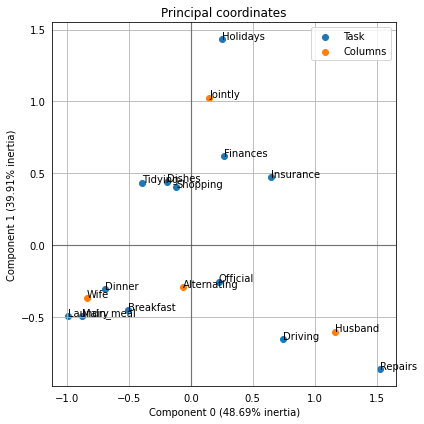

In [7]:
import prince

housetasks = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/housetasks.csv',
                         index_col=0)

ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

ca.plot_coordinates(housetasks, figsize=(6, 6))
plt.tight_layout()
plt.show()

In [8]:
housetasks

,Wife,Alternating,Husband,Jointly
Task,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3


## 7.2 K-means clustering

Clustering is a technique to divide data into different groups, where the records in each group are similar to one another. A goal of clustering is to identify significant and meaningful groups of data. The groups can be used directly, analyzed in more depth, or passed as a feature or an outcome to a predictive regression or classification model. 

K-means divides the data into K clusters by minimizing the sum of the squared distances of each record to the mean of its assigned cluster. This is referred to as the within-cluster sum of squares or within-cluster SS. K-means does not ensure the clusters will have the same size but finds the clusters that are the best separated

**Normalization**: It is typical to normalize (standardize) continuous variables by substracting the mean and dividing by the standard deviation. Otherwise, variables with large scale will dominate the clustering process

### A simple example 

Start by considering a data set with n records and just two variables, x and y. Suppose we want to split the data into K = 4 clusters. This means assigning each record (xi, yi) to a cluster k. Given an assignment of nk records to cluster k, the center of the cluster (¯xk, ¯yk) is the mean of the points in the cluster:

Cluster mean: In clustering records with multiple variables (the typical case), the term cluster mean refers not to a single number but to the vector of means of the variables

The sum of squares within a cluster is given by: SSk = Σ (i∈Cluster k) (xi −¯xk)^2 + (yi − ¯yk)^2

K-means finds the assignment of records that minimizes within-cluster sum of squares across all K clusters: SS1 + SS2 + ... + SSk

A typical use of clustering is to locate natural, separate clusters in the data. Another application is to divide the data into a predetermined number of separate groups, where clustering is used to ensure the groups are as different as possible from one another

In [11]:
from sklearn.cluster import KMeans

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters = 4).fit(df)

In [13]:
df['cluster'] = kmeans.labels_
df.head()

,XOM,CVX,cluster
2011-01-03,0.736805,0.240681,2
2011-01-04,0.168668,-0.584516,3
2011-01-05,0.026631,0.446985,2
2011-01-06,0.248558,-0.919751,3
2011-01-07,0.337329,0.180511,2


In [15]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = ['XOM', 'CVX'])
centers

,XOM,CVX
0,0.962633,1.379702
1,-1.137958,-1.746642
2,0.243415,0.337513
3,-0.328125,-0.564848


Clusters 1 and 3 represent 'down' markets, while clusters 2 and 4 represent 'up' markets 

As the K-means algorithm uses randomized starting points, the results may differ between subsequent runs and different implementations of the method. In general, you should check that the fluctuations aren’t too large

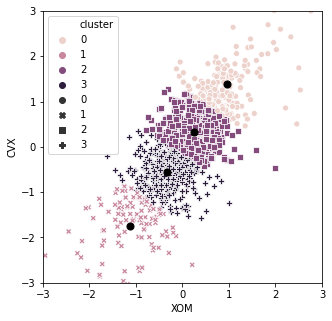

In [18]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (5,5))
ax = sns.scatterplot(x = 'XOM', y = 'CVX', hue = 'cluster', style = 'cluster', ax = ax, data = df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x = 'XOM', y = 'CVX', ax = ax, s = 50, color = 'black')

### K-means algorithm

In general, K-means can be applied to a data set with p variables X1, ...,Xp. While the exact solution to K-means is computationally very difficult, heuristic algorithms provide an efficient way to compute a locally optimal solution.

The algorithm starts with a user-specified K and an initial set of cluster means and then iterates the following steps:
1. Assign each record to the nearest cluster mean as measured by squared distance 
2. Compute the new cluster means based on the assignment of records

The algorithm converges when the assignment of records to clusters does not change

For the first iteration, you need to specify an initial set of cluster means. Usually you do this by randomly assigning each record to one of the K clusters and then finding the means of those clusters.

Since this algorithm isn’t guaranteed to find the best possible solution, it is recommended to run the algorithm several times using different random samples to initialize the algorithm. When more than one set of iterations is used, the K-means result is given by the iteration that has the lowest within-cluster sum of squares

In [20]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters = 5).fit(top_sp)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Interpreting the clusters

In [21]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 283, 4: 267, 3: 293, 2: 182, 0: 106})

In [27]:
pd.Series(kmeans.labels_).value_counts()

3    293
1    283
4    267
2    182
0    106
dtype: int64

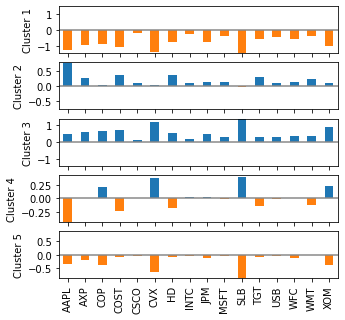

In [29]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = syms)

f, axes = plt.subplots(5, 1, figsize = (5,5), sharex = True)

for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color = '#888888')
    center.plot.bar(ax = ax, color = colors)
    ax.set_ylabel(f'Cluster {i+1}')
    ax.set_ylim(-maxPC, maxPC)

For example, clusters 1 and 3 correspond to days on which the market is down and up, respectively. Clusters 5 and 2 are characterized by up-market days for consumer stocks and down-market days for energy stocks, respectively. Finally, cluster 4 captures the days in which energy stocks were up and consumer stocks were down

**Cluster analysis versus PCA:** The plot of cluster means is similar in spirit to looking at the loadings for principal components analysis (PCA). A major distinction is that unlike with PCA, the sign of the cluster means is meaningful. PCA identifies principal directions of variation, whereas cluster analysis finds groups of records located near one another

### Selecting the number of clusters

The K-means algorithm requires that you specify the number of clusters K. Sometimes the number of clusters is driven by the application. For example, a company managing a sales force might want to cluster customers into “personas” to focus and guide sales calls. In such a case, managerial considerations would dictate the number of desired customer segments—for example, two might not yield useful differentiation of customers, while eight might be too many to manage.

In the absence of a cluster number dictated by practical or managerial considerations, a statistical approach could be used. There is no single standard method to find the “best” number of clusters.

A common approach, called the elbow method, is to identify when the set of clusters explains “most” of the variance in the data. Adding new clusters beyond this set contributes relatively little in the variance explained. The elbow is the point where the cumulative variance explained flattens out after rising steeply, hence the name of the method

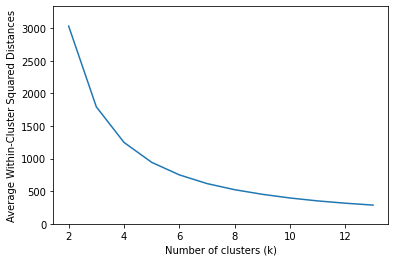

In [33]:
inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0).fit(top_sp)
    inertia.append(kmeans.inertia_ / n_clusters)

intertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})

ax = intertias.plot(x = 'n_clusters', y = 'inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * intertias.inertia.max()))
ax.legend().set_visible(False)

Use cross-validation to evaluate

## 7.3 Hierarchical clustering

Hierarchical clustering is an alternative to K-means that can yield very different clusters. Hierarchical clustering allows the user to visualize the effect of specifying different numbers of clusters. It is more sensitive in discovering outlying or aberrant groups or records. Hierarchical clustering also lends itself to an intuitive graphical display, leading to easier interpretation of the clusters

Hierarchical clustering’s flexibility comes with a cost, and hierarchical clustering does not scale well to large data sets with millions of records. For even modest-sized data with just tens of thousands of records, hierarchical clustering can require intensive computing resources. Indeed, most of the applications of hierarchical clustering are focused on relatively small data sets.

### A simple example

Hierarchical clustering works on a data set with n records and p variables and is based on two basic building blocks:
1. A distance metric di,j to measure the distance between two records i and j
2. A dissimilarity metric DA,B to measure the difference between two clusters A and B based on the distances di,j between the members of each cluster

For applications involving numeric data, the most importance choice is the dissimilarity metric. Hierarchical clustering starts by setting each record as its own cluster and iterates to combine the least dissimilar clusters.

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()
Z = linkage(df, method = 'complete')
Z

array([[ 14.        ,  15.        ,   8.59490731,   2.        ],
       [  5.        ,   9.        ,   8.70726095,   2.        ],
       [ 11.        ,  19.        ,  11.43861911,   3.        ],
       [ 18.        ,  20.        ,  13.54055199,   5.        ],
       [ 10.        ,  21.        ,  17.54262662,   6.        ],
       [ 13.        ,  16.        ,  18.30670621,   2.        ],
       [  3.        ,  17.        ,  18.96087019,   2.        ],
       [ 22.        ,  23.        ,  21.31534597,   8.        ],
       [  6.        ,  24.        ,  22.85872694,   3.        ],
       [  2.        ,  25.        ,  24.02785309,   9.        ],
       [  8.        ,  27.        ,  25.49676797,  10.        ],
       [  4.        ,  28.        ,  29.1889513 ,  11.        ],
       [ 12.        ,  26.        ,  31.15301738,   4.        ],
       [  0.        ,  29.        ,  38.98012839,  12.        ],
       [ 30.        ,  31.        ,  43.24155434,  16.        ],
       [  1.        ,  32

### The dendrogram

Text(0, 0.5, 'distance')

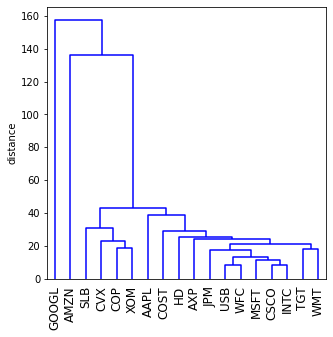

In [39]:
fig, ax = plt.subplots(figsize = (5,5))
dendrogram(Z, labels = df.index, ax = ax, color_threshold = 0)
plt.xticks(rotation = 90)
ax.set_ylabel('distance')

In [41]:
memb = fcluster(Z, 4, criterion = 'maxclust')
memb = pd.Series(memb, index = df.index)
for key, item in memb.groupby(memb):
    print(f"{key}:{','.join(item.index)}")

1:COP,CVX,SLB,XOM
2:AAPL,AXP,COST,CSCO,HD,INTC,JPM,MSFT,TGT,USB,WFC,WMT
3:AMZN
4:GOOGL


### The agglomerative algorithm

The main algorithm for hierarchical clustering is the agglomerative algorithm, which iteratively merges similar clusters. The agglomerative algorithm begins with each record constituting its own single-record cluster and then builds up larger and larger clusters. The first step is to calculate distance between all pairs of records

For each pair of records (x1, x2, ..., xp) and (y1, y2, ..., yp), we measure the distance between the two records, dx,y, using a distance metric. For example, we can use Euclidian distance: d (x, y) = √(x1 − y1)2 + (x2 − y2)2 +⋯+ (xp − yp)2

We now turn to inter-cluster distance. Consider two clusters A and B, each with a distinctive set of records, A = (a1, a2, ..., am) and B = (b1, b2, ..., bq). We can measure the dissimilarity between the clusters D(A,B) by using the distances between the members of A and the members of B.

One measure of dissimilarity is the complete-linkage method, which is the maximum distance across all pairs of records between A and B: D(A,B) = max d (ai, bj) for all pairs i, j. This defines the dissimilarity as the biggest difference between all pairs

**Agglomerative algorithm:**
1. Create an initial set of clusters with each cluster consisting of a single record for all records in the data
2. Compute the dissimilarity D(Ck, Cl) between all pairs of clusters k, l
3. Merge the two clusters Ck and Cl that are least dissimilar as measured by D(Ck, Cl)
4. If we have more than one cluster remaining, return to step 2. Otherwise, we are done

### Measures of dissimilarity

There are four common measures of dissimilarity: complete linkage, single linkage, average linkage, and minimum variance. These (plus other measures) are all supported by most hierarchical clustering software, including hclust and linkage. The complete linkage method defined earlier tends to produce clusters with members that are similar. The single linkage method is the minimum distance between the records in two clusters: D(A,B) = min d (ai, bj) for all pairs i, j

This is a “greedy” method and produces clusters that can contain quite disparate elements. The average linkage method is the average of all distance pairs and represents a compromise between the single and complete linkage methods. Finally, the minimum variance method, also referred to as Ward’s method, is similar to K-means since it minimizes the within-cluster sum of squares

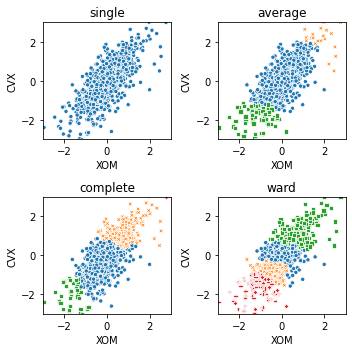

In [42]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
for i, method in enumerate(['single', 'average', 'complete', 'ward']):
    ax = axes[i // 2, i % 2]
    Z = linkage(df, method=method)
    colors = [f'C{c+1}' for c in fcluster(Z, 4, criterion='maxclust')]
    ax = sns.scatterplot(x='XOM', y='CVX', hue=colors, style=colors,
                         size=0.5, ax=ax, data=df, legend=False)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(method)

plt.tight_layout()
plt.show()

## 7.4 Model-based clustering

Clustering methods such as hierarchical clustering and k-means are based on heuristics and rely primarily on finding clusters whose members are close to one another, as measured directly with the data (no probability model involved)

Model based clustering techniques are grounded in statistical theory and provide more rigorous ways to determine the nature and number of clusters. They could be used, for example, in cases where there might be one group of records that are similar to one another but not necessarily close to one another (e.g. tech stocks with high variance of returns), and another group of records that are similar and also close (e.g. utility stocks with low variance)

### Multivariate normal distribution

The most widely used model-based clustering methods rest on the multivariate normal distribution. The multivariate normal distribution is a generalization of the normal distribution to a set of p variables X1,X2, ...,Xp. The distribution is defined by a set of means μ = μ1, μ2, ..., μp and a covariance matrix Σ. The covariance matrix is a measure of how the variables correlate with each other (see “Covariance Matrix” for details on the covariance). The covariance matrix Σ consists of p variances σ21 , σ22 , ..., σ2p and covariances σi,j for all pairs of variables i ≠ j.

Note that the covariance matrix is symmetric around the diagonal from upper left to lower right. Since σi,j = σj,i, there are only (p × (p − 1))/2 covariance terms. In total, the covariance matrix has (p × (p − 1))/2 + p parameters. The distribution is denoted by: (X1,X2, ...,Xp) ∼ Np (μ,Σ)

This is a symbolic way of saying that the variables are all normally distributed, and the overall distribution is fully described by the vector of variable means and the covariance matrix.

### Mixtures of normals

The key idea behind model-based clustering is that each record is assumed to be distributed as one of K multivariate normal distributions, where K is the number of clusters. Each distribution has a different mean μ and covariance matrix Σ. For example, if you have two variables, X and Y, then each row (Xi, Yi) is modeled as having been sampled from one of K multivariate normal distributions N (μ1,Σ1) ,N (μ2,Σ2) , ...,N (μK,ΣK).

In [44]:
from sklearn.mixture import GaussianMixture

df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components = 2).fit(df)
mclust.bic(df)

4589.32031705326

(-3.0, 3.0)

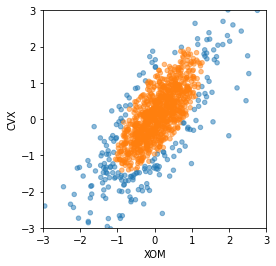

In [45]:
fig, ax = plt.subplots(figsize = (4,4))
colors = [f'C{c}' for c in mclust.predict(df)]
df.plot.scatter(x = 'XOM', y = 'CVX', c = colors, alpha = 0.5, ax = ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

There are two clusters, one cluster is in the middle of the data, and a second cluster in the outer edge of the data, this is very different from the clusters obtained using k-means and hierarchical clustering, which find clusters that are compact

In [46]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)

Mean
[[-0.05074943 -0.21539465]
 [ 0.0709161   0.10228006]]
Covariances
[[[0.98668327 0.99350046]
  [0.99350046 1.69695919]]

 [[0.27074158 0.27800893]
  [0.27800893 0.5212865 ]]]


The distributions have similar means and correlations, but the second distribution has much larger variances and covariances. Due to the randomness of the algorithm, results can vary slightly between different runs

The goal of model-based clustering is to find the best-fitting set of multivariate normal distribution. The stock data appears to have a normal-looking shape. In fact though, stock returns have a longer tailed distribution than a normal distribution. 

### Selecting the number of normals

Choose the number of clusters for which the Bayesian Information Criteria (BIC) has the least value. BIC works by selecting the best-fitting model with a penalty for the number of parameters in the model. In the case of model-based clustering, adding more clusters will always improve the fit at the expense of introducing additional parameters in the model

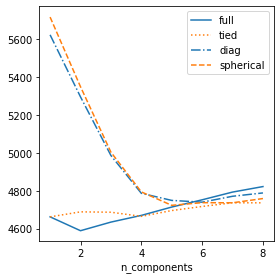

In [47]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components = n_components, warm_start=True,
                                 covariance_type = covariance_type)
        mclust.fit(df)
        results.append({
            'bic': mclust.bic(df),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })
        
results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-','C1:','C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
    subset = results.loc[results.covariance_type == covariance_type, :]
    subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type, 
                kind='line', style=styles[i]) # , color=colors[i])

plt.tight_layout()
plt.show()

The plot is similar to the elbow plot used to identify the number of clusters to choose for k-means, except the value being plotted is BIC instead of percent of variance explained

Model-based clustering techniques do have some limitations. The methods require an underlying assumption of a model for the data, and the cluster results are very dependent on that assumption. The computations requirements are higher than even hierarchical clustering, making it difficult to scale to large data. Finally, the algorithm is more sophisticated and less accessible than that of other methods.

## 7.5 Scaling and categorical variables

Unsupervised learning techniques generally require that the data be appropriately scaled. This is different from many of the techniques for regression and classification in which scaling is not important (an exception is K-Nearest Neighbors

For example, with the personal loan data, the variables have widely different units and magnitude. Some variables have relatively small values (e.g., number of years employed), while others have very large values (e.g., loan amount in dollars). If the data is not scaled, then the PCA, K-means, and other clustering methods will be dominated by the variables with large values and ignore the variables with small values

Categorical data can pose a special problem for some clustering procedures. As with K-Nearest Neighbors, unordered factor variables are generally converted to a set of binary (0/1) variables using one hot encoding. Not only are the binary variables likely on a different scale from other data, but the fact that binary variables have only two values can prove problematic with techniques such as PCA and K-means.

### Scaling the variables

Variables with very different scale and units need to be normalized appropriately before you apply a clustering procedure

In [51]:
loan_data = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan_data.csv.gz', compression = 'gzip')
loan_data

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65


In [52]:
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)
defaults = loan_data.loc[loan_data['outcome'] == 'default',]

columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 'dti', 'revol_util']

df = defaults[columns]
kmeans = KMeans(n_clusters=4, random_state=1).fit(df)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers['size'] = [counts[i] for i in range(4)]
print(centers)

      loan_amnt     annual_inc     revol_bal   open_acc        dti  \
0  10626.622656   42606.481967  10305.329397   9.596536  17.703096   
1  21974.585876  167078.689625  39219.266783  12.588492  13.384438   
2  18321.782475   83900.197919  19769.964657  11.676981  16.772819   
3  22570.192308  489783.403846  85161.346154  13.326923   6.907500   

   revol_util   size  
0   58.133368  13966  
1   63.391779   1153  
2   62.321217   7500  
3   59.651923     52  


The variables annual_inc and revol_bal dominate the clusters, and the clusters have very different sizes. Cluster 1 has only 52 members with comparatively high income and revolving credit balance

A common approach to scaling the variables is to convert them to z-scores by subtracting the mean and dividing by the standard deviation. This is termed standardization or normalization

In [53]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df0 = scaler.fit_transform(df * 1.0)

kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                       columns=columns)
centers['size'] = [counts[i] for i in range(4)]
print(centers)

      loan_amnt     annual_inc     revol_bal   open_acc        dti  \
0  13442.079327   55860.151603  16392.519712  14.313301  24.205912   
1  10493.524524   51081.129037  11615.726388   7.502365  15.921228   
2  10321.117867   53458.958279   6035.477081   8.659121  11.283710   
3  25927.849389  116476.999457  32873.220624  12.392130  16.191989   

   revol_util  size  
0   59.416848  6243  
1   77.762372  7393  
2   30.944514  5342  
3   66.152936  3693  


The cluster sizes are more balanced, and the clusters are not dominated by annual_inc and revol_bal, revealing more interesting structure in the data.

Scaling is also important for PCA. Using the z-scores is equivalent to using the correlation matrix (see “Correlation”) instead of the covariance matrix in computing the principal components.

### Dominant variables

Even in cases where the variables are measured on the same scale and accurately reflect relative importance (e.g., movement to stock prices), it can sometimes be useful to rescale the variables

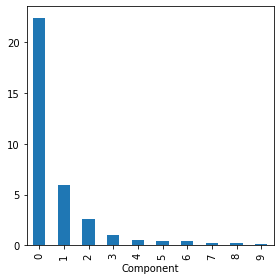

In [54]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 
        'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]

sp_pca1 = PCA()
sp_pca1.fit(top_sp1)

explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

The screeplot displays the variances for the top principal components. In this case, the screeplot reveals that the variances of the first and second components are much larger than the others. This often indicates that one or two variables dominate the loadings.

In [55]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :],
columns=top_sp1.columns)
loadings.transpose()

,0,1
GOOGL,-0.857310,0.477873
AMZN,-0.444728,-0.874149
AAPL,-0.071627,-0.020802
MSFT,-0.036002,-0.006204
CSCO,-0.029205,-0.003045
INTC,-0.026666,-0.006069
CVX,-0.089548,-0.037420
XOM,-0.080336,-0.020511
SLB,-0.110218,-0.030356
COP,-0.057739,-0.024117


The first two principal components are almost completely dominated by GOOGL and AMZN. This is because the stock price movements of GOOGL and AMZN dominate the variability.

To handle this situation, you can either include them as is, rescale the variables, or exclude the dominant variables from the analysis and handle them separately.

### Categorical data and gower's distance

In the case of categorical data, you must convert it to numeric data, either by ranking (for an ordered factor) or by encoding as a set of binary (dummy) variables. If the data consists of mixed continuous and binary variables, you will usually want to scale the variables so that the ranges are similar. One popular method is to use Gower’s distance

The basic idea behind Gower’s distance is to apply a different distance metric to each variable depending on the type of data:
1. For numeric variables and ordered factors, distance is calculated as the absolute value of the difference between two records (Manhattan distance).
2. For categorical variables, the distance is 1 if the categories between two records are different, and the distance is 0 if the categories are the same

Gower’s distance is computed as follows:
1. Compute the distance di,j for all pairs of variables i and j for each record 
2. Scale each pair di,j so the minimum is 0 and the maximum is 1
3. Add the pairwise scaled distances between variables together, using either a simple or a weighted mean, to create the distance matrix.

### Problems with clustering mixed data

K-means and PCA are most appropriate for continuous variables. For smaller data sets, it is better to use hierarchical clustering with Gower's distance. In principle, there is no reason why k-means can't be applied to binary or categorical data. You would usually use the one hot encoder representation to convert the categorical data to numeric values. In practice, however, using k-means and PCA with binary data can be difficult

If the standard z-scores are used, the binary variables will dominate the definition of the clusters. This is because 0/1 variables take on only two values, and k-means can obtain a small within-cluster sum-of-squares by assigning all the records with a 0 or 1 to a single cluster

In [60]:
defaults.loc[:,['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']].head()

,dti,payment_inc_ratio,home_,pub_rec_zero
0,1.00,2.39320,RENT,1
1,5.55,4.57170,OWN,1
2,18.08,9.71600,RENT,1
3,10.08,12.21520,RENT,1
4,7.06,3.90888,RENT,1


In [56]:
columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = pd.get_dummies(defaults[columns])

scaler = preprocessing.StandardScaler()

df0 = scaler.fit_transform(df * 1.0)
kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                       columns=df.columns)
centers

,dti,payment_inc_ratio,pub_rec_zero,home__MORTGAGE,home__OWN,home__RENT
0,17.456244,8.422914,1.000000e+00,1.000000e+00,-8.881784e-15,7.444045e-14
1,16.992128,9.105395,1.000000e+00,5.689893e-14,-1.003364e-14,1.000000e+00
2,17.197993,9.266666,9.179025e-01,1.582068e-14,1.000000e+00,1.826317e-14
3,16.504955,8.064247,-1.232348e-14,5.156600e-01,-8.604228e-16,4.843400e-01


The top four clusters are essentially proxies for the different levels of the factor variables

To avoid this behavior, you could scale the binary variables to have a smaller variance than other variables.

Alternatively, for very large data sets, you could apply clustering to different subsets of data taking on specific categorical values. For example, you could apply clustering separately to those loans made to someone who has a mortgage, owns a home outright, or rents

**Summary**

For dimension reduction of numeric data, the main tools are either principal components analysis or K-means clustering. Both require attention to proper scaling of the data to ensure meaningful data reduction

For clustering with highly structured data in which the clusters are well separated, all methods will likely produce a similar result. Each method offers its own advantage. K-means scales to very large data and is easily understood. Hierarchical clustering can be applied to mixed data types—numeric and categorical—and lends itself to an intuitive display (the dendrogram). Model-based clustering is founded on statistical theory and provides a more rigorous approach, as opposed to the heuristic methods. For very large data, however, K-means is the main method used

With noisy data, such as the loan and stock data (and much of the data that a data scientist will face), the choice is more stark. K-means, hierarchical clustering, and especially modelbased clustering all produce very different solutions. How should a data scientist proceed? Unfortunately, there is no simple rule of thumb to guide the choice. Ultimately, the method used will depend on the data size and the goal of the application.